# Functions in Python
Python handles functions much like MATLAB. Python function definitions allow you to specify input and output arguments. You can save functions to a file and call them from other scripts, notebooks, or functions that you write. 
To define a function in Python use the following syntax:

``` python
def func1(input1, input2,...):
    indented code statements
    return output(s)
```
Keep in mind, indentation is **everything in Python**. The function ends whenever the indentation ends. 

Several aspects of implementing functions in Python are different from MATLAB. Unlike MATLAB, you can have as many function definitions in one file as you like. You can then *import* this file just as you would import a package/module, such as `numpy` or `matplotlib`. For example, `fsatellite.py` is a file that contains several functions around our satellite problems. We can load it: 

dkafjldfjlskjflk

In [1]:
import fsatellite as fst

I should note here that this is not the only way to load functions from a file in Python. You can also load specific functions:
```python
from fsatellite import satellite
```
after which you may call the function like any other `satellite(arg1,...)`
You can load all functions from a file
```python
from fsatellite import *
```
after which you may again call any function in `fsatellite` like any other function `alt(h)`. It should be noted, however, that loading files like this will increase the chances of *overloading* functions (where two functions have the same name and then order of precedence must be considered).

We can now use any functions defined with within this file like

10396.111839497076
4.877355127489123


(10396.111839497076, 4.877355127489123)

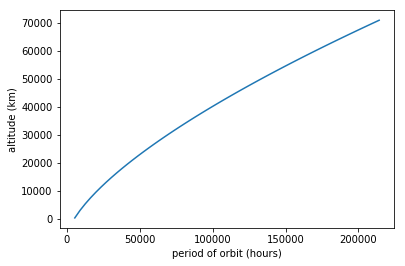

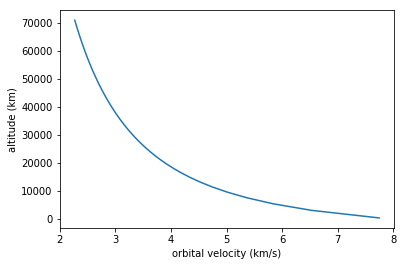

In [4]:
h,v = fst.satellite(6)
print(h)
print(v)
fst.satellite(6,1, "hr")

We can even use any function defined within the file. Let's open the file and print the contents,

In [7]:
f = open('fsatellite.py','r')
print(f.read())
f.close()

# -*- coding: utf-8 -*-
"""
This file contains functions related to calculating orbital quantities of satellites
"""
import numpy as np
import matplotlib.pyplot as pyp
from colorama import Fore, Back
G = 6.67*10**(-11);
M = 5.98*10**(24);
R = 6.371*10**(6);


def satellite(T,grph = 0,un='hr'):
    if un=="hr" or un=="hour":
        t = 3600*T;
    elif un == "day" or un == "dy":
        t = 24*3600*T;
    elif un == "min" or un== "m":
        t = 60*T;
    elif un == "s" or un=="sec":
        t=T;
    else:
        print(Fore.RED + "Error: need numerical input with a units of sec, min, hour or day")
        
    mtokm = lambda x: x/1000; #lambda functions are python's anonymous functions

    h= alt(t);
    v =orbvel(h);
    V = mtokm(v);
    H = mtokm(h);
    
    T = 3600*np.arange(1.5,60)
    h = alt(T);
    v = mtokm(orbvel(h));
    h = mtokm(h);
    if grph:
        fig(T,h);
        fig(v,h,'orbital velocity (km/s)');
    return H, V

def alt(t):
     h = (G*M*t**2/(4*np.pi**2))*

In [5]:
fst.orbvel(50000)

7881.559781023097

In [6]:
fst.mtokm(9000)

AttributeError: module 'fsatellite' has no attribute 'mtokm'

# Take home messages about Python Functions
There are several things that you should notice about the function file above:
* Everything that happens above the first function definition is global, (any function can use it). This is useful when many separate functions need similar data.
* Functions can call other functions within the same file. The ordering of the functions doesn't matter.
*  `lambda` functions are Python's 'anonymous functions', functions that are defined in 1 line. The syntax is used in `fsatellite.py` to define `mtokm`
```python
mtokm = lambda x: x/1000;
```

* Default arguments are defined in the function definition using `=` sign (not an assignment operator unless there is no input argurment in its place). You may set default values for any of your arguments, but cannot skip arguments in your functions calls.
```python
def satellite(T,grph = 0,un='hr'):
```
That is you cannot call satellite using a call of `satellite(3.5, , "day")` and hope that the default argument for `grph` will be used (because it won't). 